In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [25]:
bank_marketing = pd.read_csv('Bank Marketing.csv')
bank_marketing.head(10)

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,1
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,1
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,1
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,1
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,1


In [26]:
bank_marketing.info()
# bank_marketing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

In [27]:
# bank_marketing['Job'].value_counts() 
# bank_marketing['Marital Status'].value_counts() # married, single, divorced
# bank_marketing['Education'].value_counts() # primary, secondary, tertiary, unknown
# bank_marketing['Credit'].value_counts() # no, yes
# bank_marketing['Housing Loan'].value_counts() # yes, no
# bank_marketing['Personal Loan'].value_counts() # yes, no
# bank_marketing['Contact'].value_counts() # cellular, telephone, unknown
# bank_marketing['Poutcome'].value_counts() # unknown, other, failure, success
bank_marketing['Subscription'].value_counts() # 1, 2

1    39922
2     5289
Name: Subscription, dtype: int64

<AxesSubplot: ylabel='Frequency'>

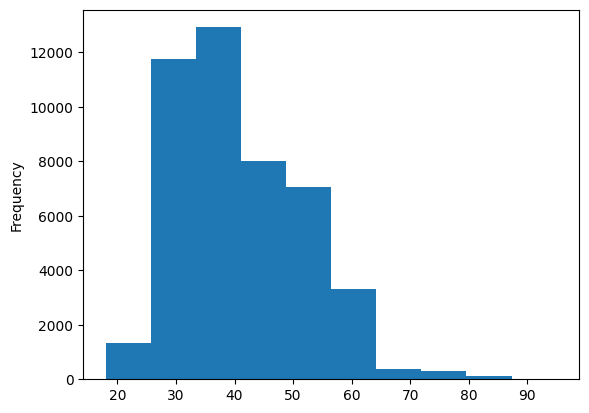

In [28]:
bank_marketing['Age'].plot.hist()

In [29]:
bank_marketing['Subscription'] = bank_marketing['Subscription'].replace({1: 0, 2: 1})
bank_marketing['Subscription'].value_counts()

0    39922
1     5289
Name: Subscription, dtype: int64

### Label encoding

In [42]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# bank_marketing['Marital Status'] = label_encoder.fit_transform(bank_marketing['Marital Status'])
# bank_marketing['Education'] = label_encoder.fit_transform(bank_marketing['Education'])
# bank_marketing['Credit'] = label_encoder.fit_transform(bank_marketing['Credit'])
# bank_marketing['Housing Loan'] = label_encoder.fit_transform(bank_marketing['Housing Loan'])
# bank_marketing['Personal Loan'] = label_encoder.fit_transform(bank_marketing['Personal Loan'])
# bank_marketing['Contact'] = label_encoder.fit_transform(bank_marketing['Contact'])
# bank_marketing['Poutcome'] = label_encoder.fit_transform(bank_marketing['Poutcome'])
bank_marketing['Last Contact Month'] = label_encoder.fit_transform(bank_marketing['Last Contact Month'])
bank_marketing['Job'] = label_encoder.fit_transform(bank_marketing['Job'])

In [43]:
bank_marketing.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [44]:
bank_marketing.dtypes

Age                      int64
Job                      int32
Marital Status           int32
Education                int32
Credit                   int32
Balance (euros)          int64
Housing Loan             int32
Personal Loan            int32
Contact                  int32
Last Contact Day         int64
Last Contact Month       int32
Last Contact Duration    int64
Campaign                 int64
Pdays                    int64
Previous                 int64
Poutcome                 int32
Subscription             int64
dtype: object

In [45]:
X, y = bank_marketing.drop('Subscription', axis=1), bank_marketing['Subscription']
X

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [38]:
y.values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [49]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [51]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [53]:
y_pred = rf.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
score

0.9063363927900033

In [57]:
from sklearn.model_selection import GridSearchCV

param = { "max_features":list(range(2, 16, 1)), "max_depth":[2, 3, 4, 5, None] }
param

{'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 'max_depth': [2, 3, 4, 5, None]}

In [58]:
rf = GridSearchCV(RandomForestClassifier(n_estimators=250, random_state = 42),
                    param, cv=5, n_jobs = -1)
rf

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15]})

In [59]:
rf.fit(X_train, y_train)

In [ ]:
# rf.best_estimator_

feature_importances = rf.best_estimator_.feature_importances_
pd.DataFrame({'feature' : bank_marketing.feature_names, 'importance' : feature_importances}).sort_values('importance', ascending=False)